In [41]:
%load_ext autoreload
%autoreload 2
from htbayes import BEST
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
df = pd.read_csv('jass-data.csv', index_col=0)
df['fractional_weight_change_0_7'] = (df['Wt(g) Day7'] - df['Wt(g) Day0']) / df['Wt(g) Day0']
df.shape

(347, 107)

In [53]:
for col in df.columns:
    print(col)

ID
Age
Sex
Group
Day sacrificed
Batch
Wt(g) Day0
Wt(g) Day1
Wt(g) Day2
Wt(g) Day3
Wt(g) Day4
Wt(g) Day5
Wt(g) Day6
Wt(g) Day7
Wt(g) Day8
Wt(g) Day9
Wt(g) Day10
Wt(g) Day11
Wt(g) Day12
Wt(g) Day13
Wt(g) Day14
Wt(g) Day15
Wt(g) Day16
Wt(g) Day17
Wt(g) Day18
Wt(g) Day19
Wt(g) Day20
Wt(g) Day21
Day3check
Day7check
Day14check
Wt change% 0_7
PR8 Total virus load (copies/ng RNA)
PA Live virus load
Lung Pathology (0-4)
Plate
IL1b (19) total
IL6 (38) total
IL10 (56) total
IL17 (72) total
IFNG (34) total
TNFA (21) total
IL2 total
IL4 total
IL5 total
IL22 total
IL1b (19) gender
IL6 (38) gender
IL10 (56) gender
IL17 (72) gender
IFNG (34) gender
TNFA (21) gender
IL2 gender
IL4 gender
IL5 gender
IL22 gender
SS1 Total bacteria load (copies/ng DNA)
Inflamm
Epi defect
Muc meta
Hyalinosis
Oxyntic at
Fov hyper
Dysplasia
Pyloric meta
Stom Pathology (sum)
Liv Pathology (0-16)
Dysplasia present score 1
Column
FACS-Sp (1)
FACS-Lu (5)
log10(viral load)
log10(bacterial load)
Wt change% 7_14
Age_Sex_Combo
Wt ch

In [66]:
col_of_interest = 'Wt change% 0_7'

In [67]:
df_filtered = df.dropna(subset=[col_of_interest])
b = BEST(data=df_filtered, sample_col='Group', baseline_name='Hp+Flu+', output_col=col_of_interest)
b.fit(n_steps=100000)

Applied log-transform to nu_minus_one and added transformed nu_minus_one_log_ to model.
INFO:pymc3:Applied log-transform to nu_minus_one and added transformed nu_minus_one_log_ to model.
Applied log-transform to sigma and added transformed sigma_log_ to model.
INFO:pymc3:Applied log-transform to sigma and added transformed sigma_log_ to model.


Iteration 0 [0%]: ELBO = -6003.9
Iteration 10000 [10%]: Average ELBO = -2563.54
Iteration 20000 [20%]: Average ELBO = -999.75
Iteration 30000 [30%]: Average ELBO = -956.83
Iteration 40000 [40%]: Average ELBO = -913.15
Iteration 50000 [50%]: Average ELBO = -860.66
Iteration 60000 [60%]: Average ELBO = -807.77
Iteration 70000 [70%]: Average ELBO = -782.92
Iteration 80000 [80%]: Average ELBO = -781.92
Iteration 90000 [90%]: Average ELBO = -781.93
Finished [100%]: Average ELBO = -781.92


(<matplotlib.figure.Figure at 0x119b24208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b584860>)

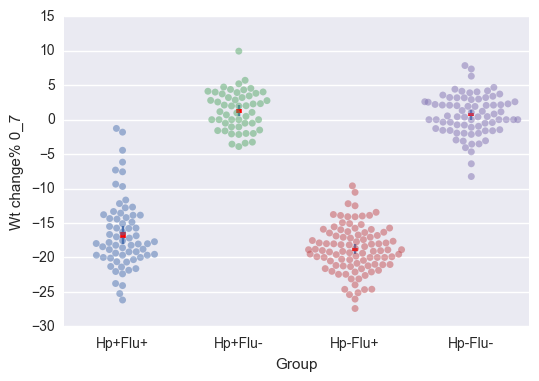

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
b.plot_posterior()
# plt.ylim(-0.5, 0.5)

In [69]:
import pymc3 as pm

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5a42e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1116e4278>]], dtype=object)

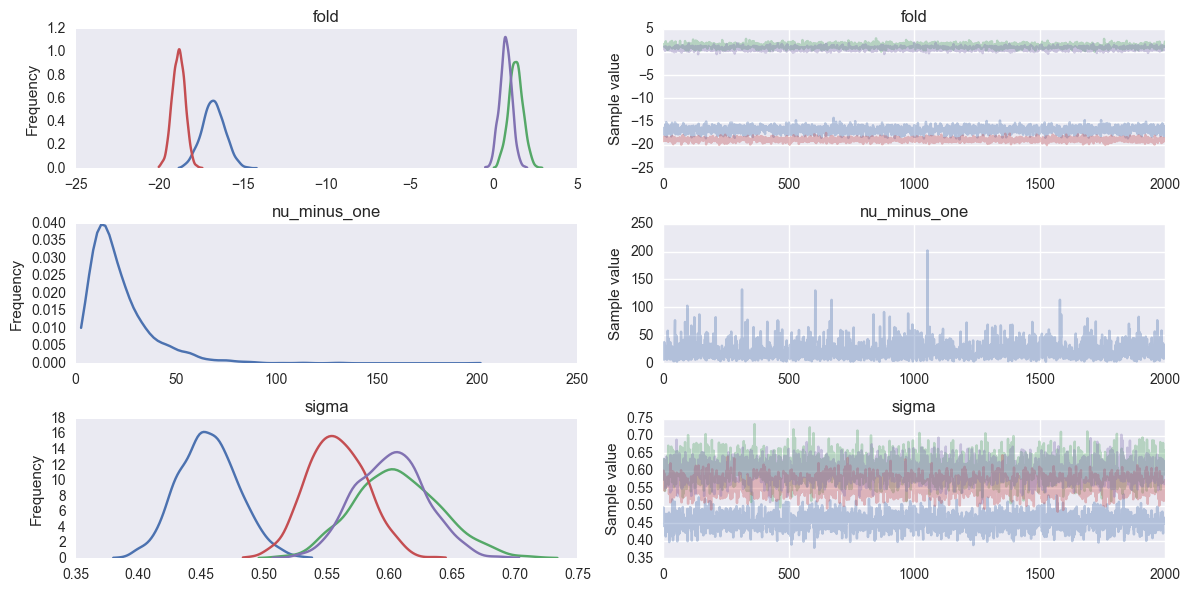

In [70]:
pm.traceplot(b.trace)